## Atividade 2, parte 2
### Anotações do capítulo 2 do livrotexto
Por se tratar de um capítulo extenso e com boas representações práticas, farei menos anotações em markdown.
<br>
<br>

Para uma representação matemática, operações em multiplos qubits são realizadas por meio de um produto tensorial
<img src="sources/multiple_qubits.png">

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble, execute
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector, visualize_transition
from math import pi

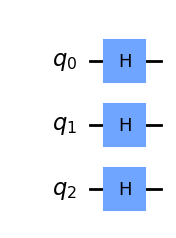

In [ ]:
# No código, para representar múltiplos qubits apenas precisamos criar eles com a função QuantumCircuit
n_qubits = 3
qc = QuantumCircuit(n_qubits)
for i in range(n_qubits):
    qc.h(i)
qc.draw(output="mpl")

In [ ]:
simulador = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = simulador.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

### Exercício 01-A
<img src="sources/atividade1_a.png">
<br>

### Exercício 01-B
<img src="sources/atividade1_b.png">
<br>

### Exercício 01-C e D
<img src="sources/atividade10_cd.png">
<br>

### Exercício 2
<img src="sources/exercicio2.png">

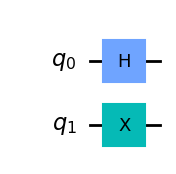

In [ ]:
# Single qubit states
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output="mpl")

In [ ]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

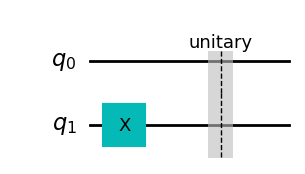

In [ ]:
# Representando uma operação de multiplicação tensorial por uma matriz identidade
qc = QuantumCircuit(2)
qc.x(1)
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
# Como a matriz identidade performa uma operação nula, ela é executada no caso deste circuito
qc.draw(output="mpl")

In [ ]:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

<center>Operação aplicada nas células acima</center>
<br>
<img src="sources/matrizIdentidade.png">

In [ ]:
# Atividade 3

qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.x(0)
qc.draw(output="mpl")

sim = Aer.get_backend('unitary_simulator')
result = execute(qc, sim).result()
unitary = result.get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

### Portas de múltiplos qubits
Existem várias portas que quando aplicadas necessitam de dois qubits, aqui vão alguns exemplos

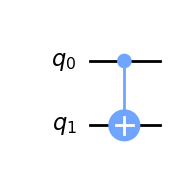

In [ ]:
# A porta controlled-not ou CNOT já foi apresentada antes.

qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output="mpl")

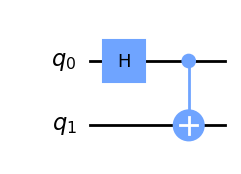

In [ ]:
# Aplicação da porta CNOT
qc = QuantumCircuit(2)
qc.h(0)

qc.cx(0,1)
qc.draw(output="mpl")

In [ ]:
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()

final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

<center> Operação realizada acima </center>
<br>
<img src="sources/entangled_state-1.png">
<br>
Esta operação é deveras especial visto que pela primeira vez nestas anotações há a presença de um estado <i>emaranhado</i> <br>
<img src="sources/bell_state.png"><br>
No código das células acima acima foi criado um estado de Bell, ou <i>Bell state</i> neste exemplo há 50% de chance do qubit ser medido como |11> e 50% de chances de ser medido |00>, porém 0% de chance de ser medido como |01> ou |10>. Como pode-se ver no histograma abaixo <br>


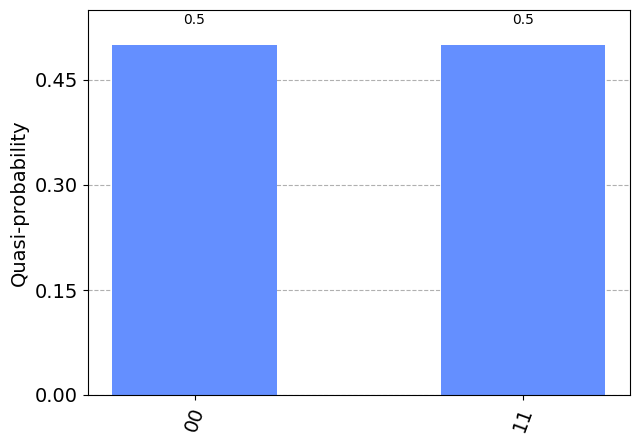

In [ ]:
plot_histogram(result.get_counts())

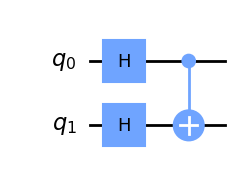

<IPython.core.display.Latex object>

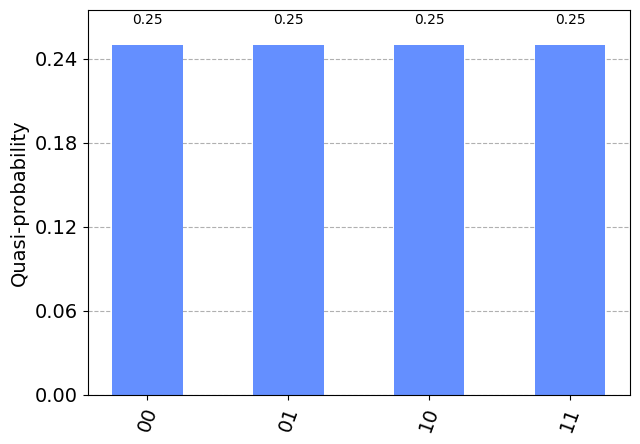

In [ ]:
# Colocando mais qubits em superposição

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw(output="mpl"))

svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
counts = svsim.run(qobj).result().get_counts()
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
display(plot_histogram(counts))

# Já que a CNOT troca a amplitude de |01> para a amplitude de |11> e ambas são iguais a 1/2, nada muda

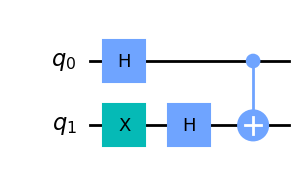

<IPython.core.display.Latex object>

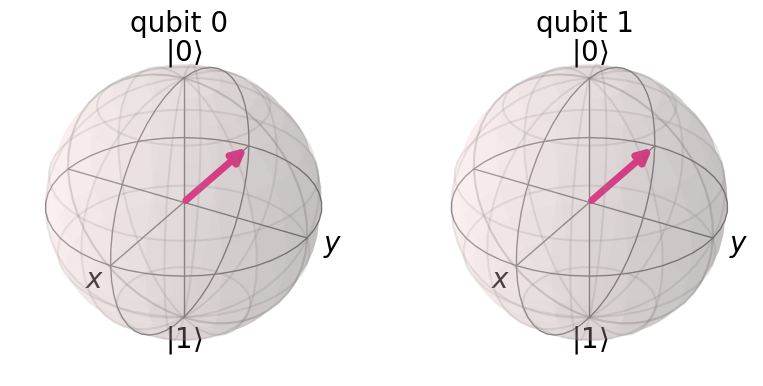

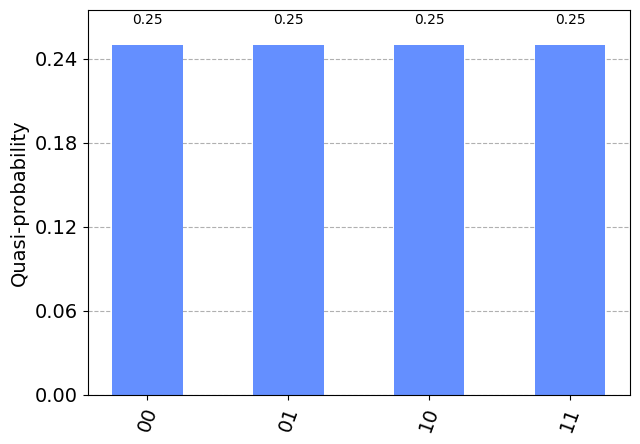

In [ ]:
# Agora, vamos testar com um qubit no estado |->
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)

display(qc.draw(output="mpl"))

qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
counts = svsim.run(qc1).result().get_counts()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
display(plot_bloch_multivector(final_state))
display(plot_histogram(counts))

#Podemos ver que neste caso, a CNOT altera apenas o qubit controle, e não o alvo, indo contra seu comportamento padrão

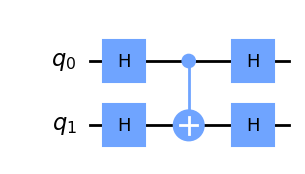

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw(output="mpl")) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

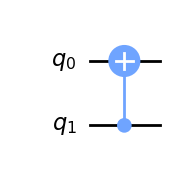

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw(output="mpl"))
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

#### Observe que no exemplo acima, as duas matrizes são equivalentes, isto ocorre devido a algo chamado de "phase kickback"
De todos os conceitos que o livrotexto apresentou até agora, este é sem dúvida o mais confuso. <br>
Irei prosseguir mesmo não tendo entendido muito bem, isto na esperança de entender com futuros exemplos

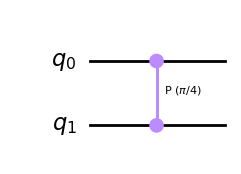

In [ ]:
# porta controlled-T
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw(output="mpl")

A porta T e a controlled-t possuem as seguintes matrizes 
<br>
<img src="sources/controlled_t.png">
<br>
Como podemos ver no circuito abaixo:

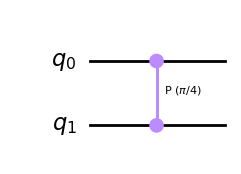

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw(output="mpl"))
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<img src="sources/t_gate_1.png">

### Sinceramente, não consegui entender muito bem o conceito de Phase Kickback pelo livrotexto, levar esta dúvida ao professor

#### Porta controle-z
Da mesma maneira que a porta controle-X aplica uma porta/operação X (NOT) quando o qubit controle está no estado |1>, a porta controle-Z aplica uma operação Z quando o qubit se encontra no mesmo estado. <br>
<br>
Lembrando que a porta Z realiza uma rotação de pi graus no eixo Z da esfera de bloch.

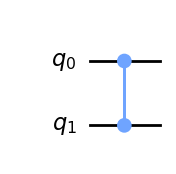

In [ ]:
qc_cz = QuantumCircuit(2)
qc_cz.cz(0, 1)
qc_cz.draw(output="mpl")

In [ ]:
# A porta Z não pode ser executada por exemplo nos computadores IBM-Q, e em vários outros
# Então surge a necessidade de reproduzir o seu efeito com portas diferentes

#### A partir daqui, se mostra essencial o conceito de kickback.
<br>

##### Eu até que consigo refazer e entender os circuitos e como eles estão tratando seus inputs, mas não estou entendendo como a informação está navegando entre as portas.
<br>

##### Sinto que seria mais produtivo tirar minhas dúvidas com o professor e depois prosseguir ao final do livrotexto, com um sólido entendimento das portas quânticas os próximos 2 capítulos (que tratam de algoritmos) serão muito melhor aproveitados.